In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
customers_df = pd.read_csv(r"C:\Users\Hp\Downloads\Customers.csv")
products_df = pd.read_csv(r"C:\Users\Hp\Downloads\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\Hp\Downloads\Transactions.csv")

In [7]:
# Merge the datasets
transactions_customers = transactions_df.merge(customers_df, on="CustomerID", how="left")
full_data = transactions_customers.merge(products_df, on="ProductID", how="left")

In [9]:
# Clean the merged dataset
full_data = full_data.drop(columns=["Price_x"])
full_data.rename(columns={"Price_y": "Price"}, inplace=True)
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
full_data['Year'] = full_data['TransactionDate'].dt.year
full_data['Month'] = full_data['TransactionDate'].dt.month

In [11]:
# Basic Statistics
print("Numerical Summary:")
print(full_data.describe())

Numerical Summary:
                     TransactionDate     Quantity   TotalValue       Price  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

              Year        Month  
count  1000.000000  1000.000000  
mean   2023.996000     6.288000  
min    2023.000000     1.000000  
25%    2024.000000     3.000000  
50%    2024.000000     6.000000  
75%    2024.000000     9.000000  
max    2024.000000    12.000000  
std   

In [13]:
# Distribution of transactions by region
region_distribution = full_data['Region'].value_counts()
print("\nTransactions by Region:")
print(region_distribution)


Transactions by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


In [15]:
# Distribution of product categories
category_distribution = full_data['Category'].value_counts()
print("\nTransactions by Category:")
print(category_distribution)


Transactions by Category:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [17]:
# Monthly transactions
monthly_transactions = full_data.groupby(['Year', 'Month']).size()
print("\nMonthly Transactions:")
print(monthly_transactions)



Monthly Transactions:
Year  Month
2023  12         4
2024  1        107
      2         77
      3         80
      4         86
      5         86
      6         69
      7         96
      8         94
      9         96
      10        70
      11        57
      12        78
dtype: int64


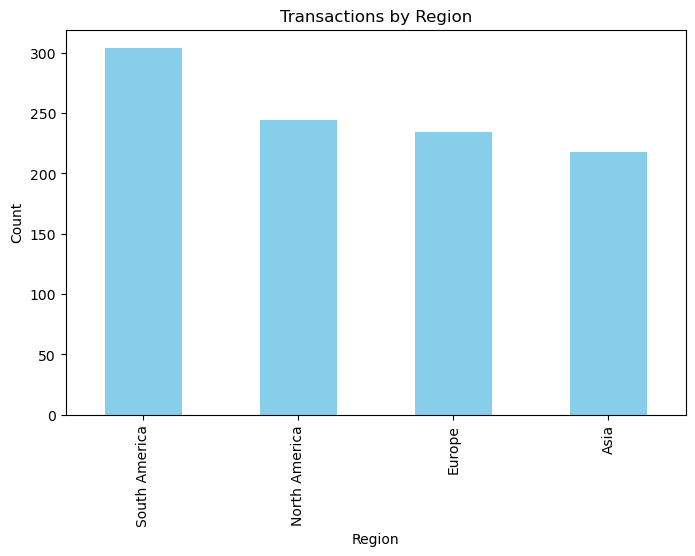

In [19]:
# Visualizations
# 1. Transactions by Region
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

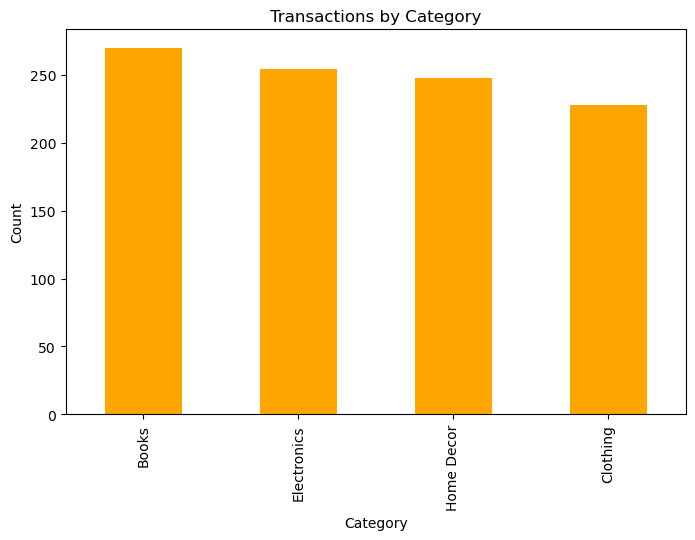

In [23]:
# 2. Transactions by Category
plt.figure(figsize=(8, 5))
category_distribution.plot(kind='bar', color='orange')
plt.title('Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

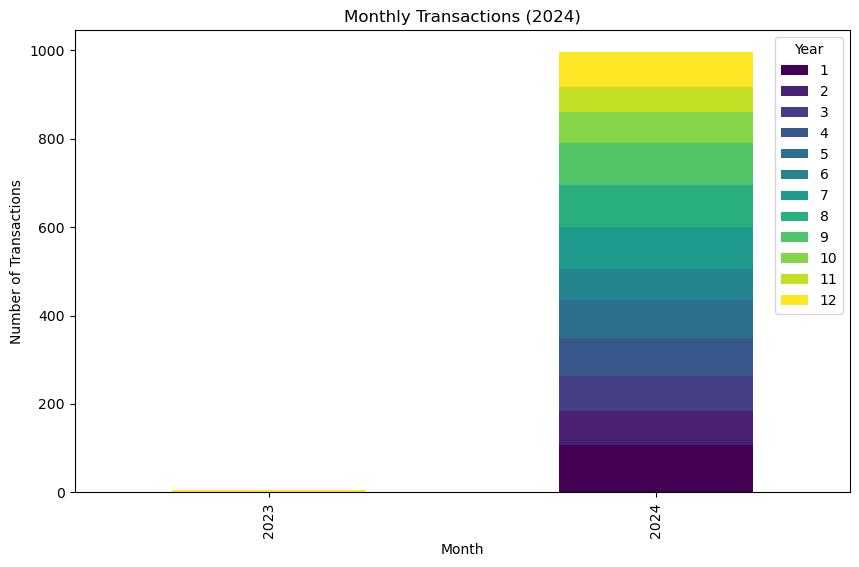

In [25]:
# 3. Monthly Transactions
monthly_transactions.unstack().plot(kind='bar', figsize=(10, 6), stacked=True, cmap='viridis')
plt.title('Monthly Transactions (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Year')
plt.show()


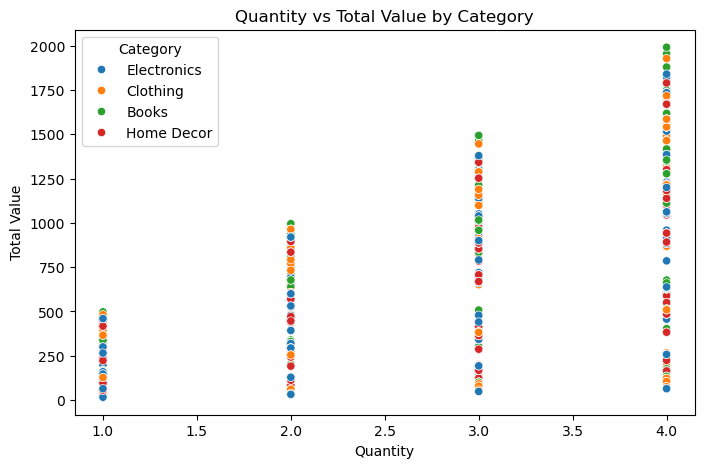

In [29]:
# 5. Total Value vs Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=full_data, x='Quantity', y='TotalValue', hue='Category')
plt.title('Quantity vs Total Value by Category')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

In [40]:
# Business Insights
print("\nBusiness Insights:")
print("1. Most transactions originate from South America (304), making it the primary market to focus on.")
print("2. Books are the most purchased category (270 transactions), indicating a strong preference for educational content.")
print("3. Peak transaction months are January (107), August, and September, suggesting seasonal demand.")
print("4. High correlation between Quantity and TotalValue (0.92) implies that larger orders directly impact revenue.")
print("5. Electronics and Home Decor have higher average prices, making them significant contributors to revenue.")


Business Insights:
1. Most transactions originate from South America (304), making it the primary market to focus on.
2. Books are the most purchased category (270 transactions), indicating a strong preference for educational content.
3. Peak transaction months are January (107), August, and September, suggesting seasonal demand.
4. High correlation between Quantity and TotalValue (0.92) implies that larger orders directly impact revenue.
5. Electronics and Home Decor have higher average prices, making them significant contributors to revenue.
